In [2]:
import numpy as np
import numpy.random as npr
import seaborn as sns
import scipy.stats as sps
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.display import HTML

display(HTML("""
<style>
.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
</style>
"""))

np.warnings.filterwarnings('ignore');
sns.set(rc={'figure.figsize':(10.7,8.27)});
cp = sns.color_palette();

discreteLine = lambda x,y,**kwargs: sns.lineplot(x, y, marker='o', **kwargs)

# Normal
## Definition

$$
P(x\,|\,\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

## Quantiles and probability
- Probability of $X$ being within $n$ standard deviations from the mean

| n | $P\,(|X| < \mu + n\sigma )$ |
|-|-|
| 1 | 68.2% |
| 2 | 95.4% |
| 3 | 99.7% |

- Percentiles

|Percentile|Value|
|-|-|
|1%| -2.33|
|2.5%| -1.96|
|5%|-1.645|
|10%| -1.28|

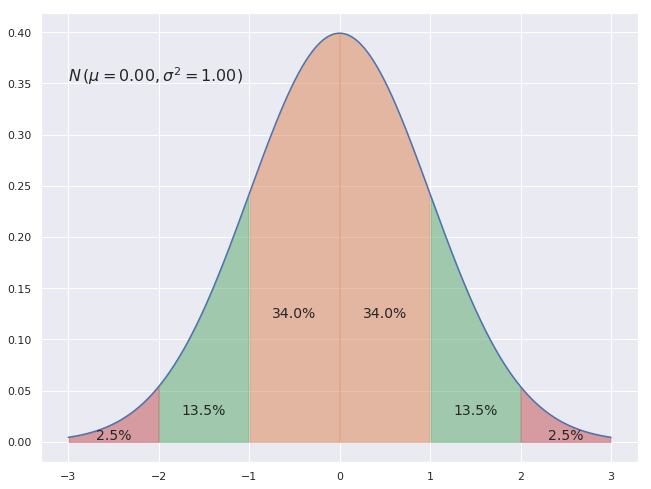

In [3]:
mu = 0
stdev = 1
P = lambda x: sps.norm.pdf(x, mu, stdev)
X = np.linspace(mu - 3*stdev, mu + 3*stdev, 1000)
ax = sns.lineplot(X, P(X))
x,y = ax.get_lines()[-1].get_data();
q = [34, 13.5, 2.45]
ax.text(mu-3*stdev, P(mu - 0.5*stdev), "$N\,(\mu = {:.2f}, \sigma^2 = {:.2f})$".format(mu, stdev), fontsize=16)
for i in range(1, 4):
    d = i * stdev
    mask = (x < i * stdev) & (x > (i - 1)*stdev)
    ax.fill_between(x[mask], y1=y[mask], alpha=0.5, color=cp[i])
    ax.fill_between(-x[mask], y1=y[mask], alpha=0.5, color=cp[i])
    t = ((mu - i * stdev) + (mu - (i - 1) * stdev)) / 2
    ax.text(t, P(mu - i * stdev) / 2, "{:.1f}%".format(q[i-1]), horizontalalignment='center', fontsize=14)
    ax.text(-t, P(mu - i * stdev) / 2, "{:.1f}%".format(q[i-1]), horizontalalignment='center', fontsize=14)

# Bernoulli

## Definition

The Bernoulli distribution is a model of a binary trial, where the outcome is either *success* or *failure* - $0$ or $1$. It is defined by:

$$
P(X) = p^x(1-p)^{1-x}
$$

# Binomial

## Definition

The Binomial distribution is defined as the outcome of $n$ Bernoulli trials, given by the formula:

$$
P(X) = {n\choose x} p^x(1-p)^{n-x}
$$

## Properties

$$\begin{align}
\mu &= \sum_i^n{x_i P(x_i)} = np\sum_i^n{ \frac{(n-1)!}{(x_i - 1)!((n-1) - (x_i-1))!}p^{x_i-1}(1-p)^{(n-1) - (x_i-1)} } \\
    &= \sum_l^m{ {m\choose l}p^l(1-p)^{m-l} } \\
    &= np(p + 1 - p)^m \\
    &= np
\end{align}$$

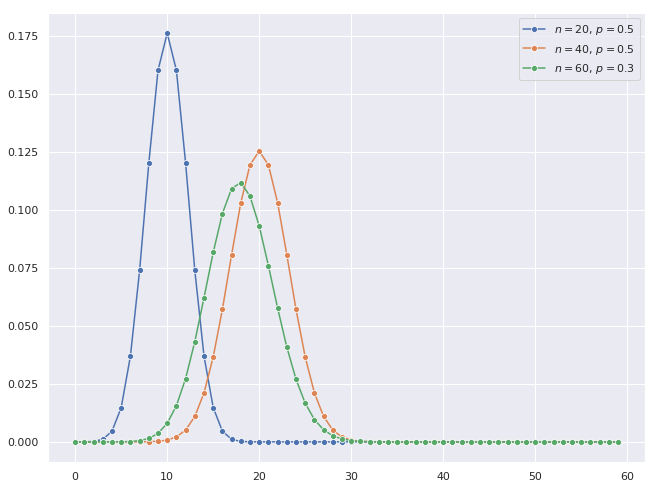

In [4]:
n = 60
X = np.arange(n)
plotPmf = lambda N, p: discreteLine(X, sps.binom.pmf(X, N, p), label="$n={},\,p={}$".format(N, p))
plotPmf(20, 0.5);
plotPmf(40, 0.5);
plotPmf(60, 0.3);

# Poisson

The Poisson distribution is an extension of the Binomial distribution. It represents the probability that a number of events occur in some interval, given an average rate of occurance $\lambda$. 

If we cut an interval into $n$ discrete sub-intervals and assume that two events cannot occur simultaneously in the same sub-interval, the average number of events that occur during the whole interval is equal to the mean of the Binomial distribution, i.e. $\lambda = \mu = np$. Substituting $p = \frac{\lambda]{n}$, we can derive the following:

$$\begin{align}
P_{Poisson}(X = x) &= \lim_{n\to\infty}{P(X)} \\
 &= \lim_{n\to\infty}{\Bigg( \frac{n(n-1)(n-2)...(n-x+1)}{n^x}\frac{\lambda^x}{x!}(1-\frac{\lambda}{n})^n(1-\frac{\lambda}{n})^{-x} \Bigg)} \\
 &= \lim_{n\to\infty}{\Bigg( \Bigg[ (1 - \frac{1}{n})(1 - \frac{2}{n})...(1 - \frac{x-1}{n}) \Bigg] }\frac{\lambda^x}{x!}(1-\frac{\lambda}{n})^n(1-\frac{\lambda}{n})^{-x} \Bigg)\\
 &= \frac{\lambda^x}{x!}e^{-\lambda}
\end{align}$$

Thus we have defined the Poisson distribution.

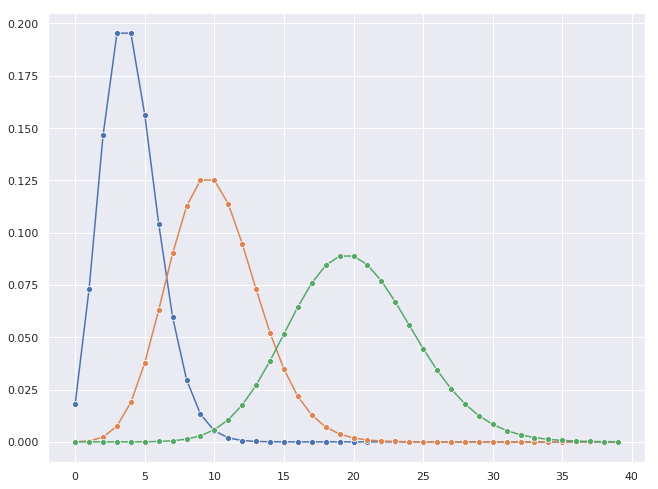

In [5]:
X = np.arange(40)
discreteLine(X, sps.poisson.pmf(X, 4));
discreteLine(X, sps.poisson.pmf(X, 10));
discreteLine(X, sps.poisson.pmf(X, 20));